In [2]:
import os
import glob

sacred_dir = "sacred_cluster"
parent_dir = os.path.dirname(os.getcwd())
info_json_files = glob.glob(os.path.join(parent_dir,sacred_dir, "**/*info.json"), recursive=True)
print(len(info_json_files))

215


In [70]:
import json
env1 = "uc"
env2 = "3"
dict_all={}
for i in info_json_files:
    exp_name = os.path.basename(os.path.dirname(i))
    exp_name_split=exp_name.split("_")
    if not(exp_name_split[4] == env1 and exp_name_split[5] == env2):
        continue
    try:
        with open(i, "r") as file:
            infos = json.load(file)
            method = exp_name_split[0]
            dict_= {}
            dict_["test_return_mean"] = [i["value"] for i in infos["test_return_mean"]]
            dict_["test_return_mean_T"] = infos["test_return_mean_T"]
            if method not in dict_all:
                dict_all[method]={}
            dict_all[method][exp_name] = dict_
    except Exception as e:
        print(i, e)
print(dict_all.keys())


dict_keys(['ddmac', 'qmix', 'qvmix'])


In [71]:
# Check dim:
for method, dict__ in dict_all.items():
    print(method)
    print(len(dict__))

ddmac
10
qmix
11
qvmix
10


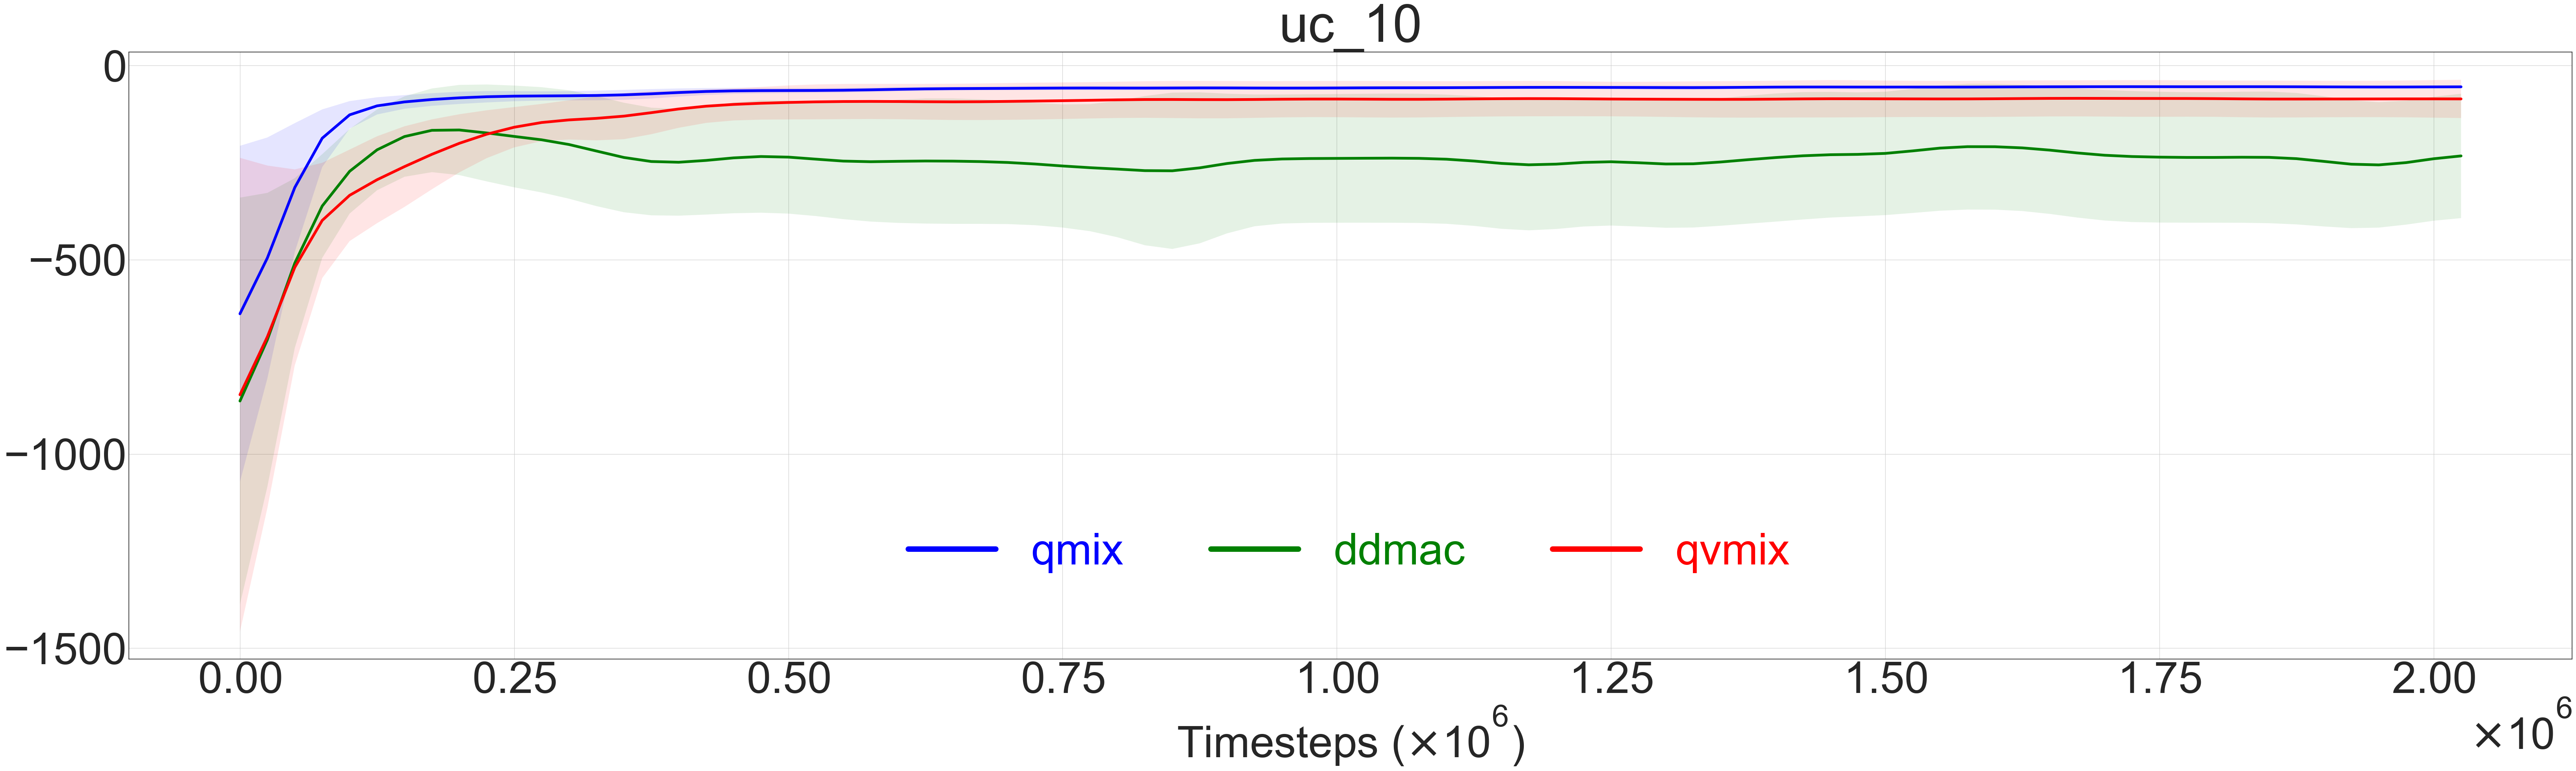

In [72]:
from matplotlib.ticker import ScalarFormatter
from scipy.ndimage import gaussian_filter1d
import numpy as np
from matplotlib import pyplot as plt

def plot_function(dict_of_exp, method, ax=None, color=None, plot_y=True,
                  plot_x=False):
    list_1 = []
    for k, v in dict_of_exp[method].items():
        list_1.append(v["test_return_mean"])
    np_ = np.array(list_1)
    mean = np.mean(np_, axis=0)
    std = np.std(np_, axis=0)

    sigma_std = 1.5
    time_steps = [i*25000 for i in range(mean.shape[0])]

    ax.plot(time_steps, gaussian_filter1d(mean, sigma=1.5), lw=5,label=method, color=color)
    ax.fill_between(time_steps, gaussian_filter1d(mean+std,sigma=sigma_std), gaussian_filter1d(mean-std,sigma=sigma_std), facecolor=color, alpha=0.1)
    # ax.set_xlim(0, 10000000)
    # ax.set_ylim(0, 1)
    # ax.tick_params(axis="x", labelsize=80)
    # ax.yaxis.set_tick_params(length=15, width=5)
    #
    # if not plot_y:
    #     ax.yaxis.set_ticklabels([])
    # else:
    #     fig.canvas.draw()
    #     ax.set_ylabel('Reward', fontsize=80)
    #     # ticks_list=[item.get_text() for item in ax.get_yticklabels()]
    #     # if float(ticks_list[-1]) < float(100):
    #     #     for idx, label in enumerate(ticks_list):
    #     #         ticks_list[idx]=str(int(float(label)*100))
    #     #     print(ticks_list)
    #     #     ax.set_yticklabels(ticks_list, fontsize=80)
    #     #     ax.yaxis.set_tick_params(length=15, width=5)
    #
    #
    # if plot_x:
    #     ax.xaxis.set_tick_params(length=15, width=5)
    #     fig.canvas.draw()
    #     ticks_list=[item.get_text() for item in ax.get_xticklabels()]
    #     print("major", ax.xaxis.get_offset_text())
    #     print(ticks_list)
    #     print(len(ticks_list[0]))
    #     for idx, label in enumerate(ticks_list):
    #         ticks_list[idx]=str(int(float(label)*10))
    #     print(ticks_list)
    #     ax.set_xticklabels(ticks_list, fontsize=80)
    xfmt = ScalarFormatter()
    xfmt.set_useMathText(True)
    ax.xaxis.set_major_formatter(xfmt)
    return mean,time_steps, ax

plt.style.use('seaborn-white')
fig, axes = plt.subplots(1, 1)
fig.set_figheight(20)
fig.set_figwidth(80)
plt.subplots_adjust(wspace=0.1)
plot_function(dict_all, "qmix", ax=axes, color="blue")
plot_function(dict_all, "ddmac", ax=axes, color="green")
plot_function(dict_all, "qvmix", ax=axes, color="red")

axes.grid()
plt.rc('font', size=80)
axes.set_xlabel('Timesteps ('+r'$\times \mathregular{10^{6}}$' + ')')
handles, labels = axes.get_legend_handles_labels()
# labels=[r"$\bf{"  + "H" + "}$", r"$\bf{"  + "S" + "}$", r"$\bf{"  + "P" + "}$"]
axbox = axes.get_position()
legend = fig.legend(handles, labels, bbox_to_anchor=[0.012, axbox.y0-0.365,1,1], loc="center", ncol=6, prop={'size': 80})

for line, text in zip(legend.get_lines(), legend.get_texts()):
    text.set_color(line.get_color())
    line.set_linewidth(10)
axes.set_title(env1+"_"+env2)
plt.plot()
plt.savefig("plots/"+env1+"_"+env2+".pdf", bbox_inches='tight')
print("")